In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import KFold
import time

In [2]:
# Tải bộ dữ liệu MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Trần Phương Anh - 6351071002")
print("✓ Đã tải bộ dữ liệu MNIST thành công!\n")

# In thông tin cơ bản
print(f"Kích thước tập train: {train_images.shape}")
print(f"Kích thước nhãn train: {train_labels.shape}")
print(f"Kích thước tập test: {test_images.shape}")
print(f"Kích thước nhãn test: {test_labels.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Trần Phương Anh - 6351071002
✓ Đã tải bộ dữ liệu MNIST thành công!

Kích thước tập train: (60000, 28, 28)
Kích thước nhãn train: (60000,)
Kích thước tập test: (10000, 28, 28)
Kích thước nhãn test: (10000,)


In [3]:
# Chuẩn hóa dữ liệu về [0, 1]
print("Trần Phương Anh - 6351071002")
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
print("\n✓ Đã chuẩn hóa giá trị pixel về khoảng [0, 1]")

# Reshape dữ liệu từ (28, 28) thành (784,)
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))
print(f"✓ Đã reshape ảnh từ (28, 28) thành (784,)")
print(f"  - Kích thước train sau reshape: {train_images.shape}")
print(f"  - Kích thước test sau reshape: {test_images.shape}")

Trần Phương Anh - 6351071002

✓ Đã chuẩn hóa giá trị pixel về khoảng [0, 1]
✓ Đã reshape ảnh từ (28, 28) thành (784,)
  - Kích thước train sau reshape: (60000, 784)
  - Kích thước test sau reshape: (10000, 784)


Trần Phương Anh - 6351071002


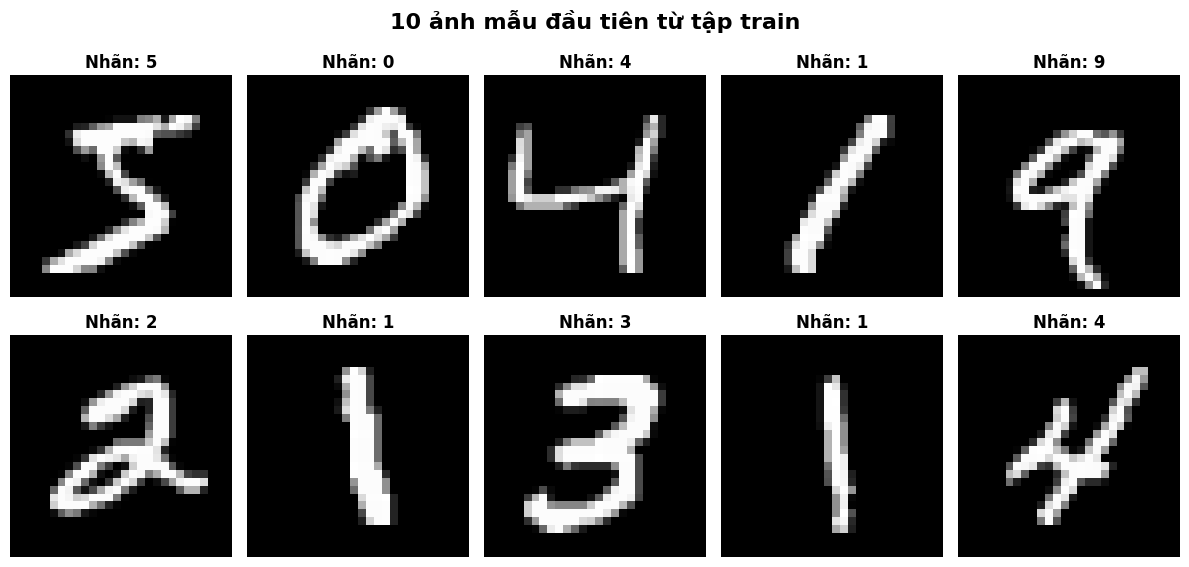

In [4]:
# Reshape lại để hiển thị
print("Trần Phương Anh - 6351071002")
sample_images = train_images[:10].reshape((10, 28, 28))

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('10 ảnh mẫu đầu tiên từ tập train', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i], cmap='gray')
    ax.set_title(f'Nhãn: {train_labels[i]}', fontsize=12, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Câu d

In [5]:
def create_model():
    """
    Tạo mô hình Neural Network cho phân loại MNIST

    Returns:
        model: Mô hình Keras đã được compile
    """
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(784,), name='hidden_layer_1'),
        layers.Dropout(0.2, name='dropout_1'),
        layers.Dense(256, activation='relu', name='hidden_layer_2'),
        layers.Dropout(0.2, name='dropout_2'),
        layers.Dense(128, activation='relu', name='hidden_layer_3'),
        layers.Dropout(0.2, name='dropout_3'),
        layers.Dense(10, activation='softmax', name='output_layer')
    ])

    # Biên dịch mô hình
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

print("Trần Phương Anh - 6351071002")
print("\n✓ Đã định nghĩa hàm create_model()")
print("\nKiến trúc mô hình:")
print("-" * 40)
print("  - Input Layer: 784 neurons (28x28 pixels)")
print("  - Hidden Layer 1: 512 neurons + ReLU + Dropout(0.2)")
print("  - Hidden Layer 2: 256 neurons + ReLU + Dropout(0.2)")
print("  - Hidden Layer 3: 128 neurons + ReLU + Dropout(0.2)")
print("  - Output Layer: 10 neurons + Softmax")
print("\nTham số compile:")
print("  - Optimizer: adam")
print("  - Loss: sparse_categorical_crossentropy")
print("  - Metrics: accuracy")

# Hiển thị summary của mô hình mẫu
print("\nSummary của mô hình:")
print("-" * 40)
sample_model = create_model()
sample_model.summary()


Trần Phương Anh - 6351071002

✓ Đã định nghĩa hàm create_model()

Kiến trúc mô hình:
----------------------------------------
  - Input Layer: 784 neurons (28x28 pixels)
  - Hidden Layer 1: 512 neurons + ReLU + Dropout(0.2)
  - Hidden Layer 2: 256 neurons + ReLU + Dropout(0.2)
  - Hidden Layer 3: 128 neurons + ReLU + Dropout(0.2)
  - Output Layer: 10 neurons + Softmax

Tham số compile:
  - Optimizer: adam
  - Loss: sparse_categorical_crossentropy
  - Metrics: accuracy

Summary của mô hình:
----------------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

# Câu e

In [6]:
# Định nghĩa KFold
k = 10
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

print("Trần Phương Anh - 6351071002")
print(f"\n✓ Đã khởi tạo KFold với:")
print(f"  - Số folds (k): {k}")
print(f"  - Shuffle: True")
print(f"  - Random state: 42")

# Khởi tạo các mảng để lưu kết quả
models = []
accuracy_per_fold = []
loss_per_fold = []
fold_histories = []

print(f"\nBắt đầu huấn luyện {k}-Fold Cross Validation...")
print("=" * 80)

start_time = time.time()
fold_no = 1

# Lặp qua từng fold
for train_index, val_index in kfold.split(train_images):
    print(f"\n{'='*80}")
    print(f"FOLD {fold_no}/{k}")
    print(f"{'='*80}")

    # Chia dữ liệu thành train và validation cho fold hiện tại
    X_train_fold = train_images[train_index]
    X_val_fold = train_images[val_index]
    y_train_fold = train_labels[train_index]
    y_val_fold = train_labels[val_index]

    print(f"\nKích thước dữ liệu:")
    print(f"  - Train: {X_train_fold.shape[0]} mẫu")
    print(f"  - Validation: {X_val_fold.shape[0]} mẫu")

    # Tạo mô hình mới cho fold này
    model = create_model()

    print(f"\n✓ Đã tạo mô hình cho Fold {fold_no}")
    print(f"\nBắt đầu huấn luyện...")
    print("-" * 80)

    # Huấn luyện mô hình
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=5,
        batch_size=32,
        verbose=1
    )

    # Đánh giá mô hình trên tập validation
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    fold_loss = scores[0]
    fold_accuracy = scores[1]

    # Lưu kết quả
    models.append(model)
    loss_per_fold.append(fold_loss)
    accuracy_per_fold.append(fold_accuracy)
    fold_histories.append(history)

    # In kết quả của fold
    print(f"\n{'='*80}")
    print(f"KẾT QUẢ FOLD {fold_no}/{k}")
    print(f"{'='*80}")
    print(f"  ✓ Loss: {fold_loss:.4f}")
    print(f"  ✓ Accuracy: {fold_accuracy:.4f} ({fold_accuracy*100:.2f}%)")
    print(f"{'='*80}")

    fold_no += 1

end_time = time.time()
total_time = end_time - start_time

print(f"\n{'='*80}")
print("HOÀN THÀNH K-FOLD CROSS VALIDATION!")
print(f"{'='*80}")
print(f"✓ Tổng thời gian huấn luyện: {total_time:.2f} giây ({total_time/60:.2f} phút)")
print(f"✓ Đã lưu {len(models)} mô hình")


Trần Phương Anh - 6351071002

✓ Đã khởi tạo KFold với:
  - Số folds (k): 10
  - Shuffle: True
  - Random state: 42

Bắt đầu huấn luyện 10-Fold Cross Validation...

FOLD 1/10

Kích thước dữ liệu:
  - Train: 54000 mẫu
  - Validation: 6000 mẫu

✓ Đã tạo mô hình cho Fold 1

Bắt đầu huấn luyện...
--------------------------------------------------------------------------------
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8646 - loss: 0.4350 - val_accuracy: 0.9643 - val_loss: 0.1162
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9603 - loss: 0.1321 - val_accuracy: 0.9735 - val_loss: 0.0903
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9724 - loss: 0.0918 - val_accuracy: 0.9722 - val_loss: 0.0934
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9752 - loss: 0.0833 - val_accuracy: 0.9745 - val_loss: 0.0827
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9791 - loss: 0.0693 - val_accurac